## Walmart Sales Prediction

## Problem Statement:
Walmart, one of the largest retail stores in the US, faces significant challenges in accurately predicting sales and demand. Various events, holidays, and economic factors such as CPI and the Unemployment Index influence sales patterns. Inaccurate demand forecasting often leads to stockouts, resulting in missed sales opportunities. Walmart's promotional markdowns, especially around holidays like the Super Bowl, Labor Day, Thanksgiving, and Christmas, further complicate the prediction process due to incomplete historical data.

The goal is to build regression models that accurately forecast sales for Walmart’s 45 stores. These models should consider factors like holiday effects, economic conditions, and markdown events, and be evaluated using metrics like R², RMSE, etc.

#### Importing the Libraries

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Data Exploration

In [2]:
# Load the dataset
df = pd.read_csv("C:/Users/Admin/Downloads/Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
# Check missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


#### There are no missing values.

#### Exploratory Data Analysis (EDA)

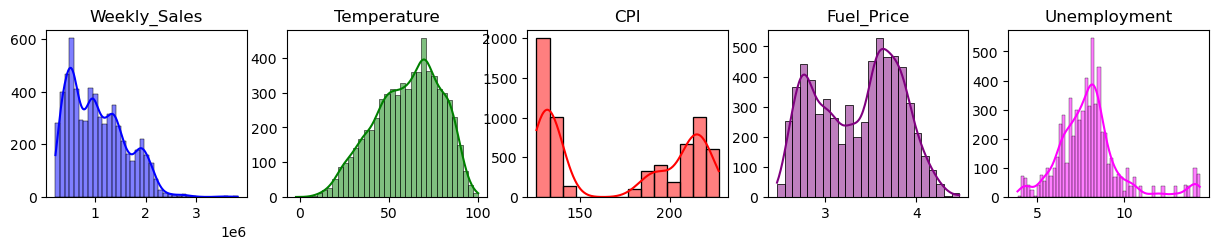

In [7]:
columns=['Weekly_Sales','Temperature','CPI','Fuel_Price','Unemployment']
plt.figure(figsize=(15,10))
colors = ['blue', 'green', 'red', 'purple','magenta']
for i,colum  in enumerate(columns,1):
    plt.subplot(4,5,i)
    sns.histplot(df[colum],color=colors[i-1],kde=True)
    plt.title(colum)
    plt.xlabel('')  
    plt.ylabel('') 
plt.show()

#### The code box plots for Weekly_Sales, Temperature, CPI, Fuel_Price, and Unemployment to show detect any outliers in these variables.¶


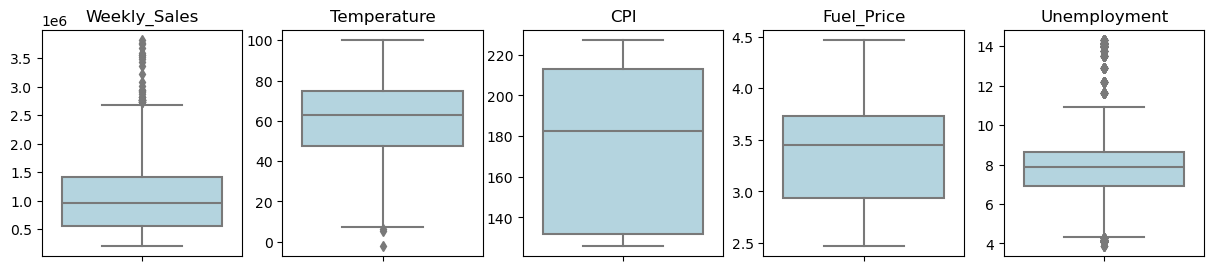

In [10]:
columns=['Weekly_Sales','Temperature','CPI','Fuel_Price','Unemployment']
plt.figure(figsize=(15,10))
colors = ['blue', 'green', 'red', 'purple','magenta']
for i,colum  in enumerate(columns,1):
    plt.subplot(3,5,i)
    sns.boxplot(data=df, y=colum,color='lightblue')
    plt.xlabel('')  
    plt.ylabel('') 
    plt.title(colum)
plt.show()

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year
df.drop('Date',axis=1,inplace=True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010


Text(0, 0.5, 'Total Sales')

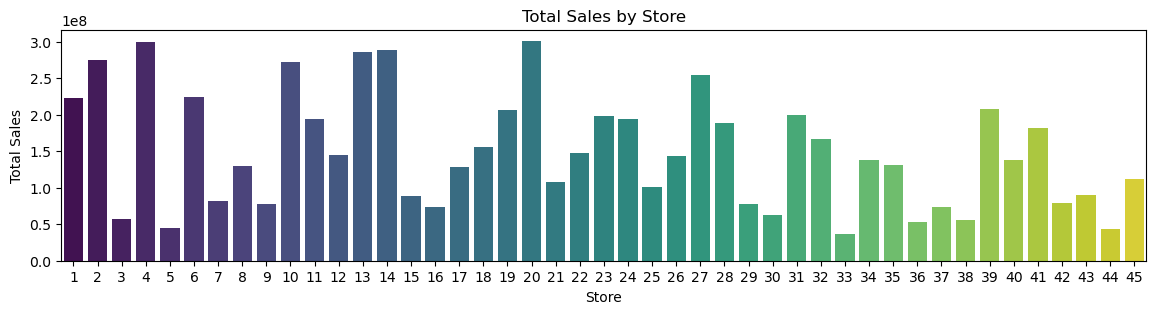

In [12]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(14, 3))
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales, palette='viridis')
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')

In [13]:
# Applying Power Transformation on numeric columns
cols =['Temperature','Fuel_Price','CPI','Unemployment']
df_numeric = df[cols]
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(standardize=True)
df_transformed = pd.DataFrame(pt.fit_transform(df_numeric),columns=cols)

pd.DataFrame({'cols':cols, 'box-cox lamda': pt.lambdas_})

for col in cols:
    df[col] = df_transformed[col]
    
    
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,1643690.90,0,-1.017966,-1.683544,1.006528,0.185804,2,2010
1,1,1641957.44,1,-1.204376,-1.732738,1.009450,0.185804,2,2010
2,1,1611968.17,0,-1.135341,-1.802251,1.010391,0.185804,2,2010
3,1,1409727.59,0,-0.799809,-1.706104,1.011002,0.185804,2,2010
4,1,1554806.68,0,-0.806467,-1.574543,1.011613,0.185804,3,2010


In [14]:
# outlier remove
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        # Define outliers as any value below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
        df = df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]
    return df

columns = ['Weekly_Sales', 'Temperature','Unemployment']

# Remove outliers
df_clean = remove_outliers(df, columns)
df_clean

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,1643690.90,0,-1.017966,-1.683544,1.006528,0.185804,2,2010
1,1,1641957.44,1,-1.204376,-1.732738,1.009450,0.185804,2,2010
2,1,1611968.17,0,-1.135341,-1.802251,1.010391,0.185804,2,2010
3,1,1409727.59,0,-0.799809,-1.706104,1.011002,0.185804,2,2010
4,1,1554806.68,0,-0.806467,-1.574543,1.011613,0.185804,3,2010
...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,0.186582,1.408278,0.604228,0.491114,9,2012
6431,45,733455.07,0,0.187148,1.380942,0.607706,0.482463,10,2012
6432,45,734464.36,0,-0.388228,1.415115,0.611181,0.482463,10,2012
6433,45,718125.53,0,-0.280200,1.344527,0.611260,0.482463,10,2012


In [15]:
yr = {2010: 1, 2011: 2, 2012: 0}
df['Year'] = df['Year'].map(yr)

In [16]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,1643690.90,0,-1.017966,-1.683544,1.006528,0.185804,2,1
1,1,1641957.44,1,-1.204376,-1.732738,1.009450,0.185804,2,1
2,1,1611968.17,0,-1.135341,-1.802251,1.010391,0.185804,2,1
3,1,1409727.59,0,-0.799809,-1.706104,1.011002,0.185804,2,1
4,1,1554806.68,0,-0.806467,-1.574543,1.011613,0.185804,3,1


#### Model Building

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [18]:
X = df.drop(['Weekly_Sales'],axis=1)
Y = df['Weekly_Sales']
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.4)
print("Original shape--->",df.shape)
print("Training shape--->",x_train.shape)
print("Testing shape--->",x_test.shape)

Original shape---> (6435, 9)
Training shape---> (3861, 8)
Testing shape---> (2574, 8)


#### The code initializes a ColumnTransformer to apply one-hot encoding to the Store column of the x_train and x_test datasets. It uses OneHotEncoder with sparse=False to create dense arrays and drop='first' to avoid multicollinearity by excluding the first category. The transformer is fitted on x_train, transforming it by encoding the Store column and leaving other columns unchanged. The same transformation is then applied to x_test, ensuring consistent encoding across both datasets.

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer = ColumnTransformer(transformers=[('tf',OneHotEncoder(sparse=False,drop='first'),['Store'])],remainder='passthrough')
x_train= transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

#### The pred_model function trains a model on the training data, predicts on the test data, and prints the model's Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² score.

In [20]:
def pred_model(model,X_train,Y_train,X_test,Y_test):
    c = model()
    c.fit(X_train,Y_train)
    y_pred = c.predict(X_test)
    print(model)
    print(f'MSE: {mean_squared_error(Y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(Y_test,y_pred)}')
    print(f'R2 : {r2_score(Y_test,y_pred)}')

#### Linear Regression Model

In [21]:
pred_model(LinearRegression,x_train,y_train,x_test,y_test)

<class 'sklearn.linear_model._base.LinearRegression'>
MSE: 24515996775.300014
MAE: 98948.37785109297
R2 : 0.9228344267829016


#### Polynomial Regression

In [22]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_train)
x_poly_t = poly.fit_transform(x_test)
pred_model(LinearRegression,x_poly ,y_train,x_poly_t,y_test)

<class 'sklearn.linear_model._base.LinearRegression'>
MSE: 22008680355.746826
MAE: 88374.49815410943
R2 : 0.9307263558986043


#### Decision Tree Regression

In [23]:
pred_model(DecisionTreeRegressor,x_train,y_train,x_test,y_test)

<class 'sklearn.tree._classes.DecisionTreeRegressor'>
MSE: 33901895014.8068
MAE: 93052.78178710179
R2 : 0.8932917479986313


#### Random Forest Regression

In [24]:
pred_model(RandomForestRegressor,x_train,y_train,x_test,y_test)

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
MSE: 21818326219.922417
MAE: 75849.96606138306
R2 : 0.9313255069810492


#### XGBRegressor

In [25]:
from xgboost import XGBRegressor
pred_model(XGBRegressor,x_train,y_train,x_test,y_test)

<class 'xgboost.sklearn.XGBRegressor'>
MSE: 16701254210.283928
MAE: 72162.70668973388
R2 : 0.9474317986581124


#### Results
Model Performance: The XGBRegressor model achieved the highest performance among the models evaluated. The results are:

MSE: 16,701,254,210.28

MAE: 72,162.71

R²: 0.9474

Key Insights:
The XGBRegressor model was able to explain 94.7% of the variance in the sales data, indicating a strong fit.
Although the model performed well overall, some error remains, particularly during periods with unusual events or holidays.

#### Conclusion
#### Summary: The XGBRegressor model demonstrated the best performance among the models evaluated. The high R² value indicates that the model effectively captures the relationship between the features and the sales predictions.

#### Implications: Accurate sales predictions can aid in better inventory management and strategic planning. This model can be useful for making data-driven decisions to optimize sales strategies.

#### Future Work: Consider experimenting with additional features or alternative models to further improve prediction accuracy. Data preprocessing and feature engineering might also enhance performance.